              PER         TS%        USG%         OWS         DWS          WS  \
count  735.000000  731.000000  735.000000  735.000000  735.000000  735.000000   
mean    13.189116    0.551122   18.320544    0.982585    0.904762    1.888435   
std      6.161601    0.119587    5.837087    1.610878    0.954020    2.383850   
min    -15.300000    0.000000    0.000000   -2.300000   -0.100000   -1.300000   
25%     10.100000    0.514500   14.300000    0.000000    0.200000    0.200000   
50%     12.800000    0.563000   17.300000    0.400000    0.600000    1.000000   
75%     16.400000    0.602500   21.650000    1.500000    1.400000    2.800000   
max     53.600000    1.500000   42.200000   12.700000    4.800000   16.700000   

            WS/48        OBPM        DBPM         BPM        VORP  
count  735.000000  735.000000  735.000000  735.000000  735.000000  
mean     0.077766   -1.402857   -0.152381   -1.554830    0.433469  
std      0.096758    3.961051    1.875939    4.901729    1.089044 

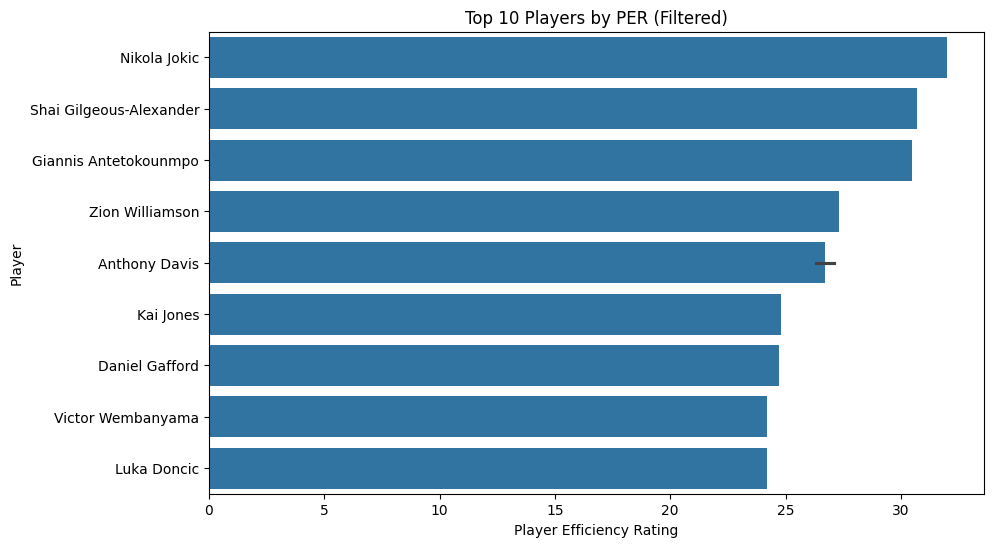

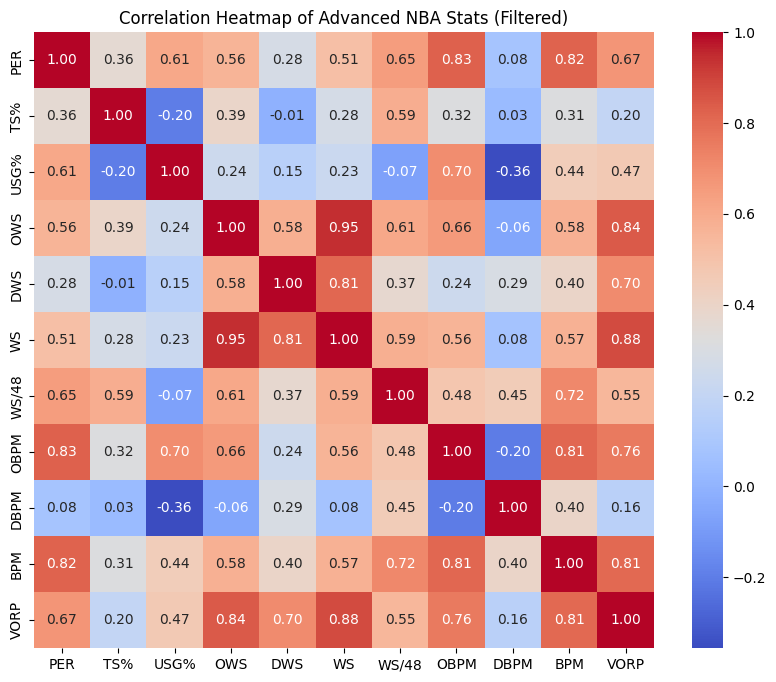

In [11]:
import pandas as pd
!pip install seaborn

# Load the uploaded file
df = pd.read_csv('/content/nba_advanced_stats_2024_2025.csv')

# Summary of numeric stats
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# STEP 1: Filter out irrelevant or low-sample players
df_filtered = df[(df['VORP'] > 0.1) & (df['WS'] > 0.1) & (df['PER'] > 5)]

# STEP 2: Get Top 10 Players by PER (from filtered)
top_per = df_filtered.sort_values(by='PER', ascending=False).head(10)

# STEP 3: Plot Top 10 PER players
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='PER', y='Player', data=top_per)
plt.title('Top 10 Players by PER (Filtered)')
plt.xlabel('Player Efficiency Rating')
plt.ylabel('Player')
plt.show()

# STEP 4: Correlation Heatmap of Advanced Stats
# Select numeric columns for correlation
numeric_cols = ['PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
data_for_heatmap = df_filtered[numeric_cols]

# Compute correlation matrix
correlation_matrix = data_for_heatmap.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Advanced NBA Stats (Filtered)')
plt.show()